In [0]:
from google.colab import files
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score

import warnings
warnings.filterwarnings("ignore")

#Seaborn Styles
sns.set_palette("Set2")
sns.set_style("ticks")

In [6]:
uploaded = files.upload()

Saving train.csv to train.csv


In [0]:
data = pd.read_csv(io.BytesIO(uploaded["train.csv"]))

In [55]:
data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [56]:
data.isnull().mean()

Dates         0.0
Category      0.0
Descript      0.0
DayOfWeek     0.0
PdDistrict    0.0
Resolution    0.0
Address       0.0
X             0.0
Y             0.0
dtype: float64

In [57]:
data.dtypes

Dates          object
Category       object
Descript       object
DayOfWeek      object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
dtype: object

We need to convert the column "Dates" to datetime

In [0]:
data["Dates"] = pd.to_datetime(data["Dates"])
data.set_index(data["Dates"], drop=True, inplace=True)

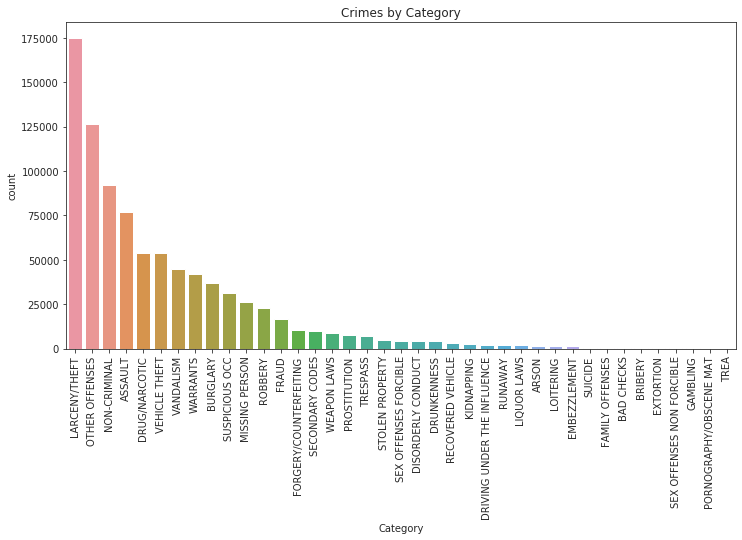

In [59]:
plt.figure(figsize=(12,6))
sns.countplot(x="Category", data=data, order=data["Category"].value_counts().index)
plt.title("Crimes by Category")
plt.xticks(rotation=90)
plt.show()

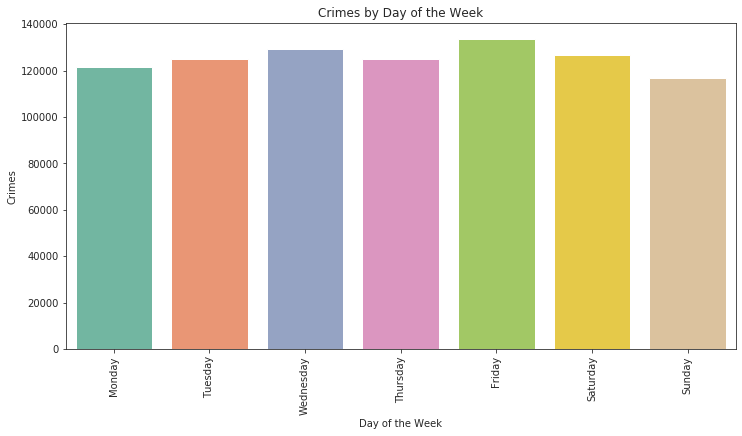

In [60]:
plt.figure(figsize=(12,6))
sns.countplot(x="DayOfWeek", data=data, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title("Crimes by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Crimes")
plt.xticks(rotation=90)
plt.show()

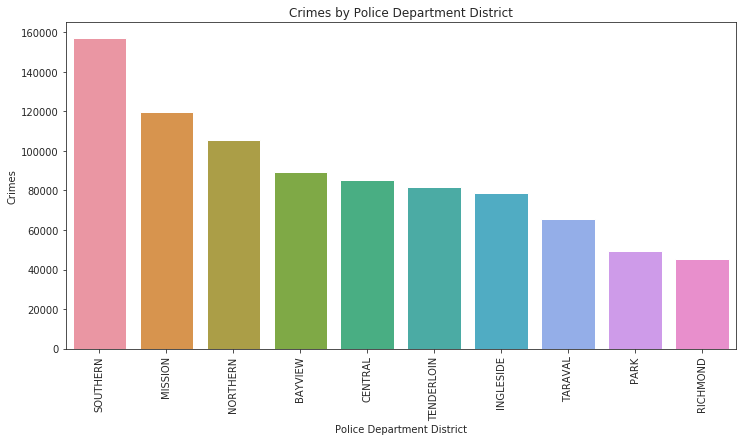

In [61]:
plt.figure(figsize=(12,6))
sns.countplot(x="PdDistrict", data=data, order=data["PdDistrict"].value_counts().index)
plt.xlabel("Police Department District")
plt.ylabel("Crimes")
plt.title("Crimes by Police Department District")
plt.xticks(rotation=90)
plt.show()


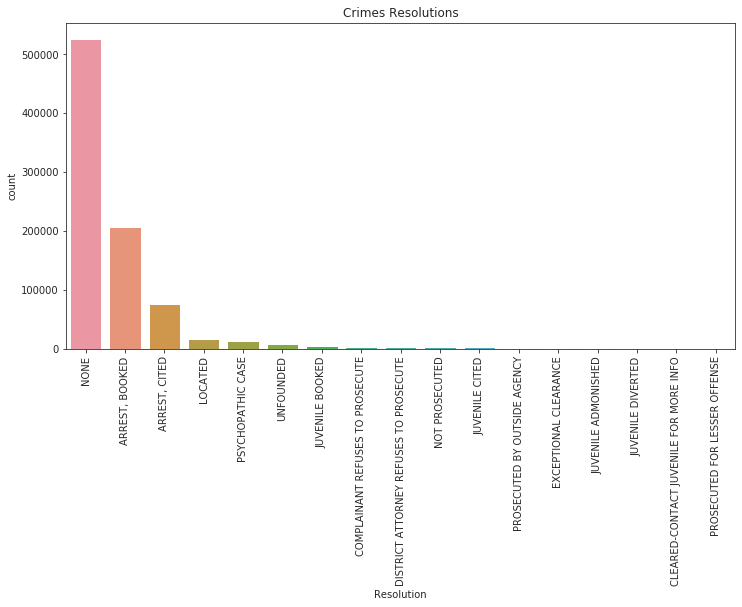

In [62]:
plt.figure(figsize=(12,6))
sns.countplot(x="Resolution", data=data, order=data["Resolution"].value_counts().index)
plt.title("Crimes Resolutions")
plt.xticks(rotation=90)
plt.show()

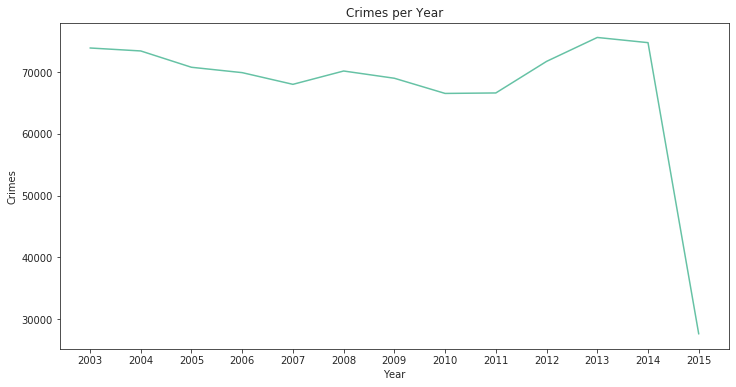

In [63]:
plt.figure(figsize=(12,6))
yearly_crimes = data["Category"].resample("Y").count()
years = [x for x in range(2003, 2016)]
sns.lineplot(x=years, y=yearly_crimes.values)
plt.xlabel("Year")
plt.ylabel("Crimes")
plt.xticks(years, years)
plt.title("Crimes per Year")
plt.show()

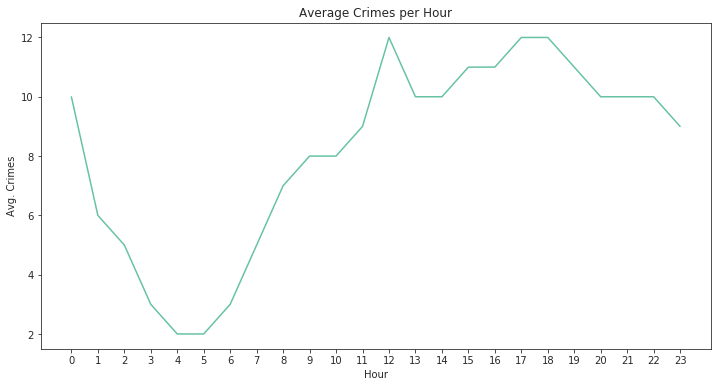

In [64]:
plt.figure(figsize=(12,6))
hourly_crimes = data["Category"].resample("H").count()
hours = [x for x in range(0, 24)]
hourly_crimes = round(hourly_crimes.groupby(hourly_crimes.index.hour).mean(),0)
hourly_crimes.values
sns.lineplot(x=hours, y=hourly_crimes.values)
plt.xlabel("Hour")
plt.ylabel("Avg. Crimes")
plt.title("Average Crimes per Hour")
plt.xticks(hours, hours)
plt.show()

In [0]:
data.drop(columns=["Descript", "PdDistrict", "Resolution", "Address"], inplace=True)

In [48]:
data.dtypes

Dates         object
Category      object
DayOfWeek     object
X            float64
Y            float64
dtype: object

XGBoost won't accept datetime format, so we need to extract the year, month, and day from the column "Dates"

In [0]:
data["Year"] = data["Dates"].dt.year
data["Month"] = data["Dates"].dt.month
data["Day"] = data["Dates"].dt.day

In [0]:
data.drop(columns=["Dates"], inplace=True)

In [0]:
data = data.rename(columns={"X":"Lon", "Y":"Lat"})

GRID IMAGE GOES HERE!

In [0]:
def section(lon, lat):
    if lat <= 37.72389280382543 and lon <= -122.49239855425999:
        return 1
    elif lat <= 37.72389280382543 and lon <= -122.47115504423:
        return 2
    elif lat <= 37.72389280382543 and lon <= -122.4499115342:
        return 3
    elif lat <= 37.72389280382543 and lon <= -122.42866802417001:
        return 4
    elif lat <= 37.72389280382543 and lon <= -122.40742451414:
        return 5
    elif lat <= 37.72389280382543 and lon <= -122.38618100411001:
        return 6
    elif lat <= 37.72389280382543 and lon <= -122.36493749408001:
        return 7
    elif lat <= 37.73990658523736 and lon <= -122.49239855425999:
        return 8
    elif lat <= 37.73990658523736 and lon <= -122.47115504423:
        return 9
    elif lat <= 37.73990658523736 and lon <= -122.4499115342:
        return 10
    elif lat <= 37.73990658523736 and lon <= -122.42866802417001:
        return 11
    elif lat <= 37.73990658523736 and lon <= -122.40742451414:
        return 12
    elif lat <= 37.73990658523736 and lon <= -122.38618100411001:
        return 13
    elif lat <= 37.73990658523736 and lon <= -122.36493749408001:
        return 14
    elif lat <= 37.755920366649285 and lon <= -122.49239855425999:
        return 15
    elif lat <= 37.755920366649285 and lon <= -122.47115504423:
        return 16
    elif lat <= 37.755920366649285 and lon <= -122.4499115342:
        return 17
    elif lat <= 37.755920366649285 and lon <= -122.42866802417001:
        return 18
    elif lat <= 37.755920366649285 and lon <= -122.40742451414:
        return 19
    elif lat <= 37.755920366649285 and lon <= -122.38618100411001:
        return 20
    elif lat <= 37.755920366649285 and lon <= -122.36493749408001:
        return 21
    elif lat <= 37.77193414806122 and lon <= -122.49239855425999:
        return 22
    elif lat <= 37.77193414806122 and lon <= -122.47115504423:
        return 23
    elif lat <= 37.77193414806122 and lon <= -122.4499115342:
        return 24
    elif lat <= 37.77193414806122 and lon <= -122.42866802417001:
        return 25
    elif lat <= 37.77193414806122 and lon <= -122.40742451414:
        return 26
    elif lat <= 37.77193414806122 and lon <= -122.38618100411001:
        return 27
    elif lat <= 37.77193414806122 and lon <= -122.36493749408001:
        return 28
    elif lat <= 37.78794792947315 and lon <= -122.49239855425999:
        return 29
    elif lat <= 37.78794792947315 and lon <= -122.47115504423:
        return 30
    elif lat <= 37.78794792947315 and lon <= -122.4499115342:
        return 31
    elif lat <= 37.78794792947315 and lon <= -122.42866802417001:
        return 32
    elif lat <= 37.78794792947315 and lon <= -122.40742451414:
        return 33
    elif lat <= 37.78794792947315 and lon <= -122.38618100411001:
        return 34
    elif lat <= 37.78794792947315 and lon <= -122.36493749408001:
        return 35
    elif lat <= 37.803961710885076 and lon <= -122.49239855425999:
        return 36
    elif lat <= 37.803961710885076 and lon <= -122.47115504423:
        return 37
    elif lat <= 37.803961710885076 and lon <= -122.4499115342:
        return 38
    elif lat <= 37.803961710885076 and lon <= -122.42866802417001:
        return 39
    elif lat <= 37.803961710885076 and lon <= -122.40742451414:
        return 40
    elif lat <= 37.803961710885076 and lon <= -122.38618100411001:
        return 41
    elif lat <= 37.803961710885076 and lon <= -122.36493749408001:
        return 42
    elif lat <= 37.819975492297004 and lon <= -122.49239855425999:
        return 43
    elif lat <= 37.819975492297004 and lon <= -122.47115504423:
        return 44
    elif lat <= 37.819975492297004 and lon <= -122.4499115342:
        return 45
    elif lat <= 37.819975492297004 and lon <= -122.42866802417001:
        return 46
    elif lat <= 37.819975492297004 and lon <= -122.40742451414:
        return 47
    elif lat <= 37.819975492297004 and lon <= -122.38618100411001:
        return 48
    elif lat <= 37.819975492297004 and lon <= -122.36493749408001:
        return 49    

In [0]:
data["Section"] = data.apply(lambda row: section(row["Lon"], row["Lat"]), axis=1)

In [0]:
data.drop(columns=["Lon", "Lat"], inplace=True)
data.dropna(inplace=True)

In [32]:
data.head()

,Category,DayOfWeek,Year,Month,Day,Section
0,WARRANTS,Wednesday,2015,5,13,33.0
1,OTHER OFFENSES,Wednesday,2015,5,13,33.0
2,OTHER OFFENSES,Wednesday,2015,5,13,40.0
3,LARCENY/THEFT,Wednesday,2015,5,13,40.0
4,LARCENY/THEFT,Wednesday,2015,5,13,25.0


In [0]:
data_dummies = pd.get_dummies(data, columns=["Category", "DayOfWeek", "Month", "Day"])

In [0]:
X = data_dummies.drop(columns=["Section"])
y = data_dummies["Section"]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
%%time
model = XGBClassifier(verbosity=1, objective="multi:softprob")
model.fit(X_train, y_train)

In [0]:
%%time
correct = 0
for i in range(0,len(X_test)):
    top = pd.DataFrame({"Section":model.classes_, "Probability":model.predict_proba(X_test)[i]}).sort_values(by="Probability", ascending=False).head(2)
    if y_test.iloc[i] in top["Section"].unique():
        correct += 1
accuracy = correct/len(X_test)
print("Accuracy: {}".format(accuracy))